Importing packages for further use later

In [54]:
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots in-notebook
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

plt.style.use('fivethirtyeight')

Importing and perfoming exploratory data analysis on the beer.csv

In [55]:
data1 = Path('.', 'data', 'craft-cans','beers.csv') # Works better cross-platform than hard-coding path as a string
beer = pd.read_csv(data1)
beer = beer.drop('Unnamed: 0',1)

beer.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


Looking at the data types and other initial exploratory measures

In [56]:
beer.dtypes

abv           float64
ibu           float64
id              int64
name           object
style          object
brewery_id      int64
ounces        float64
dtype: object

In [57]:
beer.shape

(2410, 7)

In [58]:
beer.describe()

,abv,ibu,id,brewery_id,ounces
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241
std,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.001000,4.000000,1.000000,0.000000,8.400000
25%,0.050000,21.000000,808.250000,93.000000,12.000000
50%,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,0.067000,64.000000,2075.750000,366.000000,16.000000
max,0.128000,138.000000,2692.000000,557.000000,32.000000


In [59]:
beer.loc[:,'style'].value_counts()

American IPA                           424
American Pale Ale (APA)                245
American Amber / Red Ale               133
American Blonde Ale                    108
American Double / Imperial IPA         105
American Pale Wheat Ale                 97
American Brown Ale                      70
American Porter                         68
Saison / Farmhouse Ale                  52
Witbier                                 51
Fruit / Vegetable Beer                  49
Kölsch                                  42
Hefeweizen                              40
American Stout                          39
American Pale Lager                     39
Cider                                   37
American Black Ale                      36
German Pilsener                         36
Märzen / Oktoberfest                    30
American Amber / Red Lager              29
Cream Ale                               29
Czech Pilsener                          28
American Pilsner                        25
Belgian Pal

Clearly, data is missing from the ibu column

In [60]:
beer.isnull().sum()

abv             62
ibu           1005
id               0
name             0
style            5
brewery_id       0
ounces           0
dtype: int64

Importing the breweries.csv and performing exploratory data analysis on it.

In [61]:
data2 = Path('.', 'data','craft-cans', 'breweries.csv')
breweries = pd.read_csv(data2)
breweries = breweries.drop('Unnamed: 0',1)

breweries.head()

,name,city,state
0,NorthGate Brewing,Minneapolis,MN
1,Against the Grain Brewery,Louisville,KY
2,Jack's Abby Craft Lagers,Framingham,MA
3,Mike Hess Brewing Company,San Diego,CA
4,Fort Point Beer Company,San Francisco,CA


In [62]:
breweries.dtypes

name     object
city     object
state    object
dtype: object

In [63]:
breweries.shape

(558, 3)

In [64]:
breweries.describe()

,name,city,state
count,558,558,558
unique,551,384,51
top,Lucette Brewing Company,Portland,CO
freq,2,17,47


In [65]:
breweries.isnull().sum()

name     0
city     0
state    0
dtype: int64

For later use, looking at the most popular styles of beer

In [66]:
most_popular1 = beer.groupby('style').count()
most_popular2 = most_popular1.sort_values(by = 'id', ascending=False)
most_popular2.head()

,abv,ibu,id,name,brewery_id,ounces
style,,,,,,
American IPA,417,301,424,424,424,424
American Pale Ale (APA),239,153,245,245,245,245
American Amber / Red Ale,125,77,133,133,133,133
American Blonde Ale,104,61,108,108,108,108
American Double / Imperial IPA,103,75,105,105,105,105


Now, merging the two dataframes

In [67]:
breweries.loc[:, 'brewery_id'] = breweries.index
beers = beer.merge(breweries, on = 'brewery_id')
beers.head()

,abv,ibu,id,name_x,style,brewery_id,ounces,name_y,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN


Performing exploratory analysis on the merged dataframe

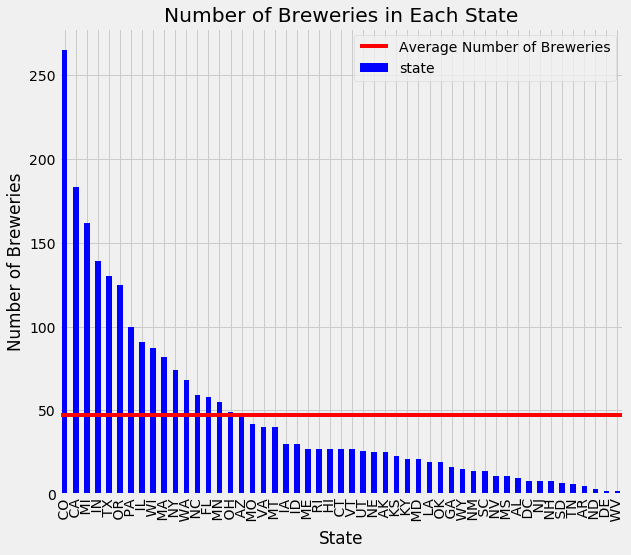

In [68]:
plot1 = beers.state.value_counts().plot(kind = 'bar', title = 'Number of Breweries in Each State', 
                                        colormap='winter',figsize=(9,8))
plot1.set_xlabel('State')
plot1.set_ylabel('Number of Breweries')
meanline = plot1.axhline(beers.state.value_counts().mean(), label = 'Average Number of Breweries', color='red')
plot1.legend();

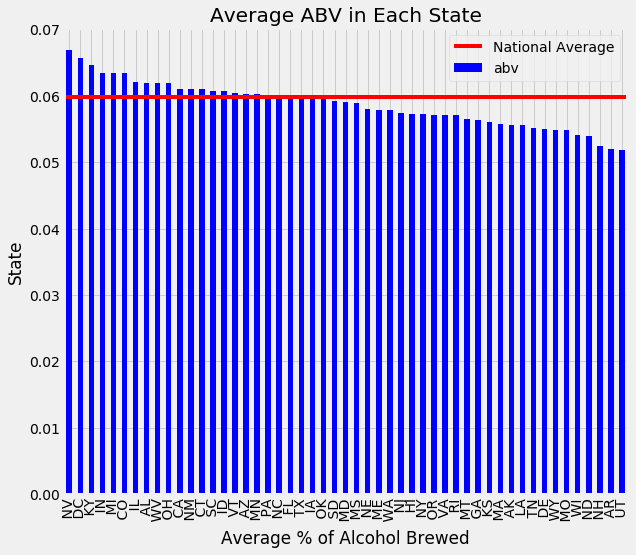

In [69]:
plot2 = beers.groupby('state')['abv'].mean().sort_values(ascending=False).plot(kind = 'bar',
                                                                       title = 'Average ABV in Each State', 
                                                                       color= 'blue',
                                                                      figsize = (9,8))
plot2.set_xlabel('Average % of Alcohol Brewed')
plot2.set_ylabel('State')
meanline2 = plot2.axhline(beers.abv.mean(), color = 'r', label = 'National Average')
plot2.legend();

# Linear Regression Model

In [70]:
beers.head()

,abv,ibu,id,name_x,style,brewery_id,ounces,name_y,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN


In [71]:
beers.dropna(axis=0, inplace=True)

In [72]:
beers.isnull().sum()

abv           0
ibu           0
id            0
name_x        0
style         0
brewery_id    0
ounces        0
name_y        0
city          0
state         0
dtype: int64

In [73]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

feature_cols = ['abv']
X = beers.loc[:,feature_cols]
y = beers.loc[:,'ibu']

linreg.fit(X,y)
y_pred = linreg.predict(X)

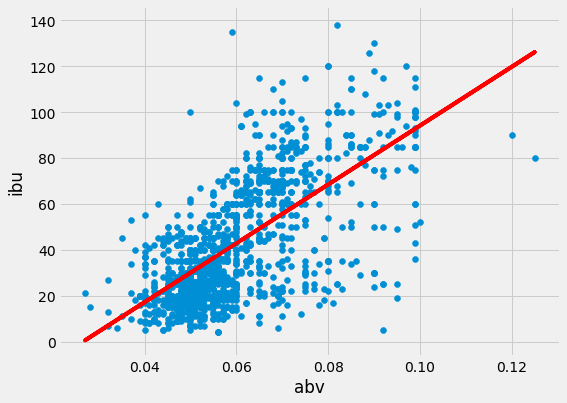

In [74]:
plt.plot(X.values, y_pred, color='red')
plt.scatter(X.values, y)
plt.xlabel('abv')
plt.ylabel('ibu');

Measures of how well the Linear Regression Model works

In [75]:
print(linreg.intercept_)
print(linreg.coef_)

-34.0676453352
[ 1281.86075709]


In [76]:
linreg.score(X,y)

0.44986855092122924

In [77]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y)

null_pred = np.ones(y_test.shape)
null_pred *= y_train.mean()
np.sqrt(metrics.mean_squared_error(y_test, null_pred)) #standard deviation

27.89152209658517

# Fixing The Dataset (Theoretically)

In [95]:
data1 = Path('.', 'data', 'craft-cans','beers.csv')
beer = pd.read_csv(data1)
beer = beer.drop('Unnamed: 0',1)

beer.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [96]:
data2 = Path('.', 'data','craft-cans', 'breweries.csv')
breweries = pd.read_csv(data2)
breweries = breweries.drop('Unnamed: 0',1)

breweries.head()

,name,city,state
0,NorthGate Brewing,Minneapolis,MN
1,Against the Grain Brewery,Louisville,KY
2,Jack's Abby Craft Lagers,Framingham,MA
3,Mike Hess Brewing Company,San Diego,CA
4,Fort Point Beer Company,San Francisco,CA


In [97]:
breweries.loc[:, 'brewery_id'] = breweries.index
beers = beer.merge(breweries, on = 'brewery_id')
beers.head()

,abv,ibu,id,name_x,style,brewery_id,ounces,name_y,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN


In [98]:
abv_mean = beers.loc[:,'abv'].mean()
abv_mean

0.05977342419080093

In [99]:
ibu_mean = beers.loc[:,'ibu'].mean()
ibu_mean

42.71316725978647

Filling all the NaN values with the mean respective to that column

In [100]:
beers['abv'] = beers['abv'].fillna(value = abv_mean)
beers['ibu'] = beers['ibu'].fillna(value = ibu_mean)
beers.isnull().sum()

abv           0
ibu           0
id            0
name_x        0
style         5
brewery_id    0
ounces        0
name_y        0
city          0
state         0
dtype: int64

Dropping the 5 rows that don't have a style input

In [102]:
beers.dropna(axis=0, inplace=True)
beers.isnull().sum()

abv           0
ibu           0
id            0
name_x        0
style         0
brewery_id    0
ounces        0
name_y        0
city          0
state         0
dtype: int64

Performing a linear regression model on the 'fixed' data

In [103]:
linreg = LinearRegression()

feature_cols = ['abv']
X = beers.loc[:,feature_cols]
y = beers.loc[:,'ibu']

linreg.fit(X,y)
y_pred = linreg.predict(X)

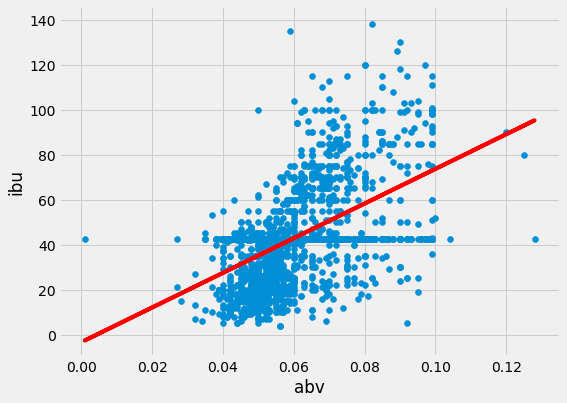

In [104]:
plt.plot(X.values, y_pred, color='red')
plt.scatter(X.values, y)
plt.xlabel('abv')
plt.ylabel('ibu');

Scoring for how well this new Linear Model works

In [105]:
print(linreg.intercept_)
print(linreg.coef_)

-3.3405987154
[ 770.6975216]


In [106]:
linreg.score(X,y)

0.27048023891265072

In [107]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y)

null_pred = np.ones(y_test.shape)
null_pred *= y_train.mean()
np.sqrt(metrics.mean_squared_error(y_test, null_pred)) #standard deviation

19.954434036992993

# Decision Tree Model

In [151]:
#import the beer dataframe
data1 = Path('.', 'data', 'craft-cans','beers.csv') 
beer = pd.read_csv(data1)
beer = beer.drop('Unnamed: 0',1)

#import the breweries dataframe
data2 = Path('.', 'data','craft-cans', 'breweries.csv')
breweries = pd.read_csv(data2)
breweries = breweries.drop('Unnamed: 0',1)

#merge the two dataframes
breweries.loc[:, 'brewery_id'] = breweries.index
beers = beer.merge(breweries, on = 'brewery_id')

#dropping all the null values
beers.dropna(axis=0, inplace=True)

In [122]:
beers.isnull().sum()

abv           0
ibu           0
id            0
name_x        0
style         0
brewery_id    0
ounces        0
name_y        0
city          0
state         0
dtype: int64

Manually implementing a Bagged Decision Tree

In [152]:
beers.head()

,abv,ibu,id,name_x,style,brewery_id,ounces,name_y,city,state
14,0.061,60.0,1979,Bitter Bitch,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
21,0.099,92.0,1036,Lower De Boom,American Barleywine,368,8.4,21st Amendment Brewery,San Francisco,CA
22,0.079,45.0,1024,Fireside Chat,Winter Warmer,368,12.0,21st Amendment Brewery,San Francisco,CA
24,0.044,42.0,876,Bitter American,American Pale Ale (APA),368,12.0,21st Amendment Brewery,San Francisco,CA
25,0.049,17.0,802,Hell or High Watermelon Wheat (2009),Fruit / Vegetable Beer,368,12.0,21st Amendment Brewery,San Francisco,CA


In [130]:
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(max_depth=None, random_state=123)

In [131]:
# Create ten bootstrap samples (which will be used to select rows from the DataFrame).
nums = np.arange(14)
samples = [np.random.choice(nums, size=14, replace=True) for _ in range(10)]
samples

[array([ 5,  9,  7, 13, 12,  9,  2,  8,  4,  4,  1,  3,  8,  6]),
 array([ 9,  5,  8,  0,  5, 13,  5,  7, 12,  4,  7, 10,  7,  8]),
 array([ 5,  9, 13,  9,  1, 12, 11,  4,  6,  2,  4,  7,  6, 13]),
 array([ 4,  3,  4,  4,  7,  0,  1, 12, 13,  7, 10, 13, 12,  2]),
 array([10,  5,  0,  8,  9,  0, 11, 10, 11,  6,  6,  5,  8,  6]),
 array([ 6,  9, 11,  9,  9,  5,  0,  7,  2,  8,  3, 11,  3,  9]),
 array([ 3, 10,  3,  9,  4,  7,  9,  1,  7,  4,  5,  8,  6,  1]),
 array([ 8,  5,  7, 12, 12,  7,  9, 12, 11,  6,  7,  2,  8,  8]),
 array([ 1, 10, 10,  0,  5,  6,  6,  2,  8,  0,  8, 12,  3,  3]),
 array([ 1, 12, 10,  6, 12,  9,  1,  2,  4,  3, 12,  4,  0,  0])]

In [135]:
X_test = beers.iloc[:, [0]]
y_test = beers.iloc[:, 1]

In [139]:
predictions = []

for sample in samples:
    X_train = beers.iloc[sample, [0]]
    y_train = beers.iloc[sample, 1]
    treereg.fit(X_train, y_train)
    y_pred = treereg.predict(X_test)
    predictions.append(y_pred)
predictions = np.array(predictions)

In [140]:
np.mean(predictions, axis=0)

array([ 64. ,  88.6,  46.4, ...,  64. ,  70. ,  17. ])

In [141]:
from sklearn import metrics

y_pred = np.mean(predictions, axis=0)
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

21.727823096377694

In [142]:
#calculating the MAE
metrics.mean_absolute_error(y_test, y_pred)

16.491304347826087

# Out of Sample Error

In [143]:
for sample in samples:
    print(set(sample))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13}
{0, 4, 5, 7, 8, 9, 10, 12, 13}
{1, 2, 4, 5, 6, 7, 9, 11, 12, 13}
{0, 1, 2, 3, 4, 7, 10, 12, 13}
{0, 5, 6, 8, 9, 10, 11}
{0, 2, 3, 5, 6, 7, 8, 9, 11}
{1, 3, 4, 5, 6, 7, 8, 9, 10}
{2, 5, 6, 7, 8, 9, 11, 12}
{0, 1, 2, 3, 5, 6, 8, 10, 12}
{0, 1, 2, 3, 4, 6, 9, 10, 12}


In [144]:
# Show the "out-of-bag" observations for each sample.
for sample in samples:
    print(sorted(set(range(14)) - set(sample)))

[0, 10, 11]
[1, 2, 3, 6, 11]
[0, 3, 8, 10]
[5, 6, 8, 9, 11]
[1, 2, 3, 4, 7, 12, 13]
[1, 4, 10, 12, 13]
[0, 2, 11, 12, 13]
[0, 1, 3, 4, 10, 13]
[4, 7, 9, 11, 13]
[5, 7, 8, 11, 13]


In [146]:
from sklearn.ensemble import BaggingRegressor
bagreg = BaggingRegressor(DecisionTreeRegressor(), n_estimators=500, bootstrap=True, oob_score=True, random_state=1)

In [148]:
# Fit and predict.
bagreg.fit(X_train, y_train)
y_pred = bagreg.predict(X_test)
y_pred

array([ 59.26 ,  87.766,  49.5  , ...,  59.26 ,  65.644,  17.874])

Calculating the 'Out-of-sample' error

In [156]:
bagreg.oob_score_

0.92524853946100594

In [153]:
#calulating the MAE
metrics.mean_absolute_error(y_test, y_pred)

17.068698503207415